# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
df.shape

(16650, 16)

In [4]:
df.drop_duplicates()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [6]:
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [7]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [8]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [9]:
df.mau.value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

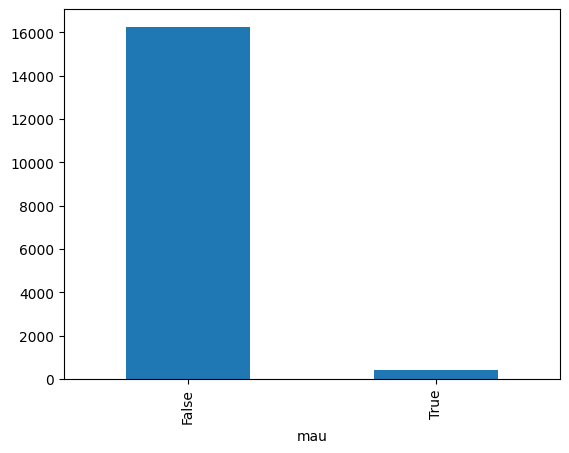

In [10]:
mau_counts = df['mau'].value_counts()

mau_counts.plot(kind='bar')
plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [11]:
types_list = [str(type(df[col][0])).split("'")[1] for col in df.columns]

print(types_list)

['str', 'str', 'str', 'numpy.int64', 'str', 'str', 'str', 'str', 'numpy.float64', 'numpy.float64', 'numpy.int64', 'numpy.int64', 'numpy.int64', 'numpy.int64', 'numpy.float64', 'numpy.bool_']


In [12]:
lista_categorias = [df[col].nunique() for col in df.columns]

print(lista_categorias)

[2, 2, 2, 8, 5, 5, 5, 6, 5298, 3005, 1, 2, 2, 2, 9, 2]


In [13]:
nomes = df.columns.to_list()
print(nomes)

['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'possui_celular', 'possui_fone_comercial', 'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau']


In [14]:
data = pd.DataFrame({'Nome': nomes, 'Tipo': types_list, 'qtd_categorias': lista_categorias})
                   
data

,Nome,Tipo,qtd_categorias
0,sexo,str,2
1,posse_de_veiculo,str,2
2,posse_de_imovel,str,2
3,qtd_filhos,numpy.int64,8
4,tipo_renda,str,5
5,educacao,str,5
6,estado_civil,str,5
7,tipo_residencia,str,6
8,idade,numpy.float64,5298
9,tempo_emprego,numpy.float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [15]:
data = data[data['qtd_categorias'] == 2]
data

,Nome,Tipo,qtd_categorias
0,sexo,str,2
1,posse_de_veiculo,str,2
2,posse_de_imovel,str,2
11,possui_fone_comercial,numpy.int64,2
12,possui_fone,numpy.int64,2
13,possui_email,numpy.int64,2
15,mau,numpy.bool_,2


In [16]:
df.sexo = df.sexo.map({'F': 1, 'M': 0})

In [17]:
df.posse_de_veiculo = df.posse_de_veiculo.map({'Y': 1, 'N': 0})

In [18]:
df.posse_de_imovel = df.posse_de_imovel.map({'Y': 1, 'N': 0})

In [19]:
# Quando provo a far lo stesso però con la variabile 'mau' non funziona
# df.mau = df.mau.map({'True': 1, 'False': 0}) 
# I valori diventno NaN, perché?

In [20]:
def mau(valor):
    if valor == 'True':
        return 1
    else:
        return 0

df['mau'] = df['mau'].apply(mau)

In [21]:
df  

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,0
1,1,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,0
2,1,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,0
3,0,1,1,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,0
4,1,1,0,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,1,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,0
16646,1,0,1,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,0
16647,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,0
16648,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,0


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [22]:
tabela_cruzada = pd.crosstab(df['possui_email'], df['posse_de_veiculo'])

tabela_cruzada

posse_de_veiculo,0,1
possui_email,,
0,9341,5829
1,837,643


In [23]:
df_heatmap = df[['posse_de_veiculo',
 'possui_email',
 'mau']]

In [24]:
df_heatmap.head()

,posse_de_veiculo,possui_email,mau
0,1,0,0
1,0,1,0
2,0,1,0
3,1,1,0
4,1,0,0


c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:252: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


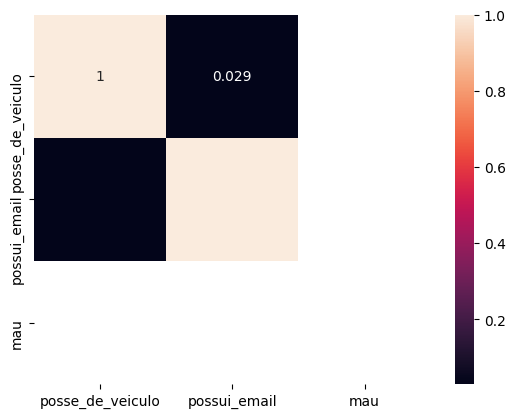

In [25]:
sns.heatmap(df_heatmap.corr(), annot=True)
plt.show()

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [26]:
df.to_csv('DataFrame.csv')